<h1><b>FINAL PROJECT BIG DATA DAN DATA MINING</b></h1>
<ul>
    <p><b>Di Buat Oleh : </b></p>
    <li><b>Nama : Haikal Raditya Fadhilh</b></li>
    <li><b>NIM : 21.11.3910</b></li>
    <li><b>Kelas: Informatika 02</b></li>
</ul>

<h2><b>IMPORT LIBRARY</b></h2>

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.utils import resample
from scipy.stats import sem

<h2><b>IMPORT DATASET</b></h2>

In [10]:
# path = '/content/drive/MyDrive/Big Data & Data Mining/FP/parkinsons_updrs.csv'
path = './parkinsons_updrs.csv'
df = pd.read_csv(path)

<h2><b>DATA PRE-PROCESSING</b></h2>

<h3><b>MELIHAT DATA SAMPLE DATA</b></h3>

In [11]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [12]:
df.tail()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


<h3><b>MELIHAT NAMA KOLOM SERTA TIPE DATANYA</b></h3>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

<h3><b>MELIHAT JUMLAH BARIS DAN KOLOM</b></h3>

In [14]:
print(f"Jumlah Kolom Dalam Dataset : {len(df.columns)}")
print(f"Jumlah Baris Dalam Dataset : {len(df)}")

Jumlah Kolom Dalam Dataset : 22
Jumlah Baris Dalam Dataset : 5875


<h3><b>MELIHAT DATA NULL PADA DATASET</b></h3>

In [15]:
df.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

<h3><b>MELIHAT DESKRIPSI DATASET</b></h3>

In [16]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


<h3><b>MENGHAPUS KOLOM</b></h3>

In [17]:
df.drop(columns=['subject#','Jitter(Abs)','test_time','Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP','Shimmer(dB)','Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA'],inplace=True)

<p>Dalam perintah diatas,saya melakukan beberapa berubahan sebagai berikut : </p>
<ul>
    <li>Menghapus nilai beberapa kolom jitter (Ukuran Variasi Interval Suara) dengan jenis pengukuran yang berbeda,namun kita mengambil hasil yang berbentuk persen saja,dikarenakan kolom tersebut sudah mewakili kolom-kolom jitter yang lain</li>
    <li>Menghapus kolom shimmer (ukuran variabilitas / fluktuasi amplitudo dari pita suara) Dan hanya mengambil perwakilan pengukuran shimer saja</li>
</ul>

<h3><b>VISUALISASI KORELASI DARI SETIAP KOLOM</b></h3>

<Axes: title={'center': 'Korelasi Antar Variabel (Heatmap) Dalam Dataset'}>

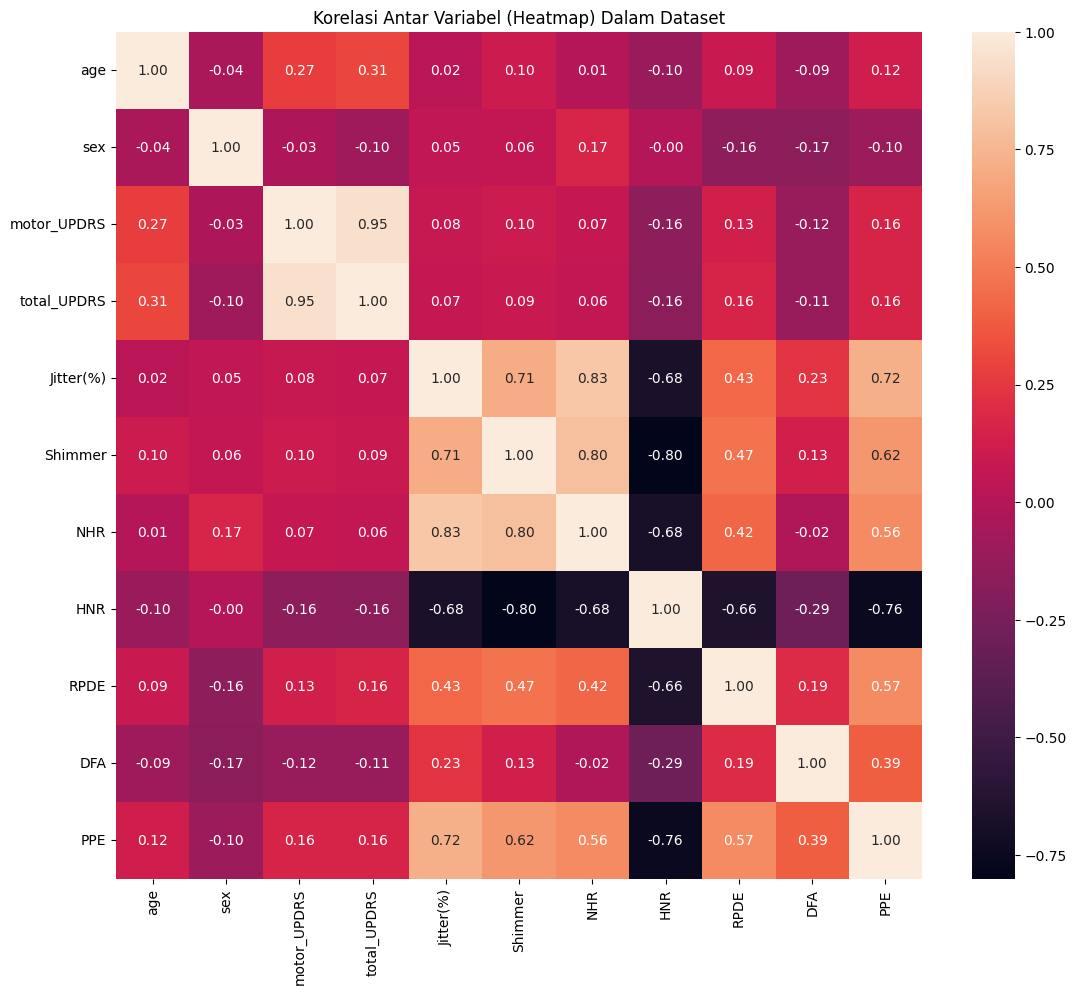

In [18]:
plt.figure(figsize=(13,11))
plt.title('Korelasi Antar Variabel (Heatmap) Dalam Dataset')
sns.heatmap(df.corr(),annot=True,fmt='.2f')

<h3><b>MENGHAPUS DATA DUPLIKAT PADA DATASET</b></h3>

In [19]:
df.drop_duplicates(inplace=True)

<h3><b>MENGUBAH NAMA KOLOM MENJADI HURUF KECIL</b></h3>

In [20]:
df.rename(columns={'Jitter(%)':'jitter'},inplace=True)

In [21]:
df.columns = df.columns.str.lower()

<h3><b>MELIHAT KOLOM SETELAH DI PRE-PROCESSING</b></h3>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5875 entries, 0 to 5874
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          5875 non-null   int64  
 1   sex          5875 non-null   int64  
 2   motor_updrs  5875 non-null   float64
 3   total_updrs  5875 non-null   float64
 4   jitter       5875 non-null   float64
 5   shimmer      5875 non-null   float64
 6   nhr          5875 non-null   float64
 7   hnr          5875 non-null   float64
 8   rpde         5875 non-null   float64
 9   dfa          5875 non-null   float64
 10  ppe          5875 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 550.8 KB


<h2><b>EDA (Exploratory Data Analysis)</b></h2>

<h3><b>MELIHAT SAMPLE DATASET</b></h3>

In [23]:
df.head()

,age,sex,motor_updrs,total_updrs,jitter,shimmer,nhr,hnr,rpde,dfa,ppe
0,72,0,28.199,34.398,0.00662,0.02565,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,28.447,34.894,0.00300,0.02024,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,28.695,35.389,0.00481,0.01675,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,28.905,35.810,0.00528,0.02309,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,29.187,36.375,0.00335,0.01703,0.011625,26.126,0.47188,0.56122,0.19361


<h3><b>MELIHAT KOLOM UPDRS (Unified Parkinson's Disease Rating Scale) DARI SETIAP UMUR</b></h3>

In [24]:
df[['age','motor_updrs','total_updrs']].groupby('age').min().sort_values('total_updrs',ascending=True)

,motor_updrs,total_updrs
age,,
65,5.0377,7.0000
57,7.0630,7.0881
36,6.0102,8.0356
58,6.5651,10.6460
74,10.7370,15.2630
60,12.2240,15.4480
67,10.0290,16.0290
72,13.0420,19.0500
55,13.5120,19.2370


<p><b>Dengan hasil percobaan diatas menghasilkan kesimpulan bahwa Umur tidak begitu berperngaruh dalam menetukan nilai UPDRS yang artinya bisa saja umur rendah namun sudah teridentifikasi terkena penyakit Parkinson Yang Parah</b></p>

<h3><b>FEATURE SELECTION</b></h3>

In [25]:
dfc = df[['motor_updrs', 'total_updrs', 'jitter',
       'shimmer', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']]

<p>Dalam melakukan EDA dan analisis terhadap fitur-fitur yang ada dalam dataset,saya memutuskan untuk mengambil beberapa fitur dengan tujuan clustering pasien berdasarkan Data Kesehatan yang terdapat pada dataset Hasil Monitoring Penyakit Parkinson,dengan tujuan akhir apakah pasien tersebut sudah termasuk membaik (Sehat) atau Masih Sakit</p>

<h3><b>VISUALISASI FEATURE UPDRS</b></h3>

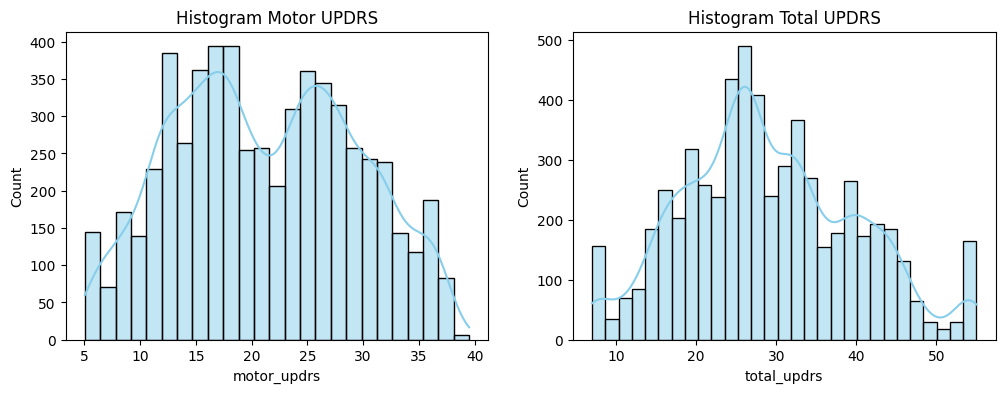

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(dfc['motor_updrs'], ax=axs[0], kde=True, color='skyblue')
axs[0].set_title('Histogram Motor UPDRS')

sns.histplot(dfc['total_updrs'], ax=axs[1], kde=True, color='skyblue')
axs[1].set_title('Histogram Total UPDRS')

plt.show()

<h3><b>VISUALISASI DATASET DENGAN SCATTER PLOT</b></h3>

/home/haik/anaconda3/envs/BigData/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1300 with 0 Axes>

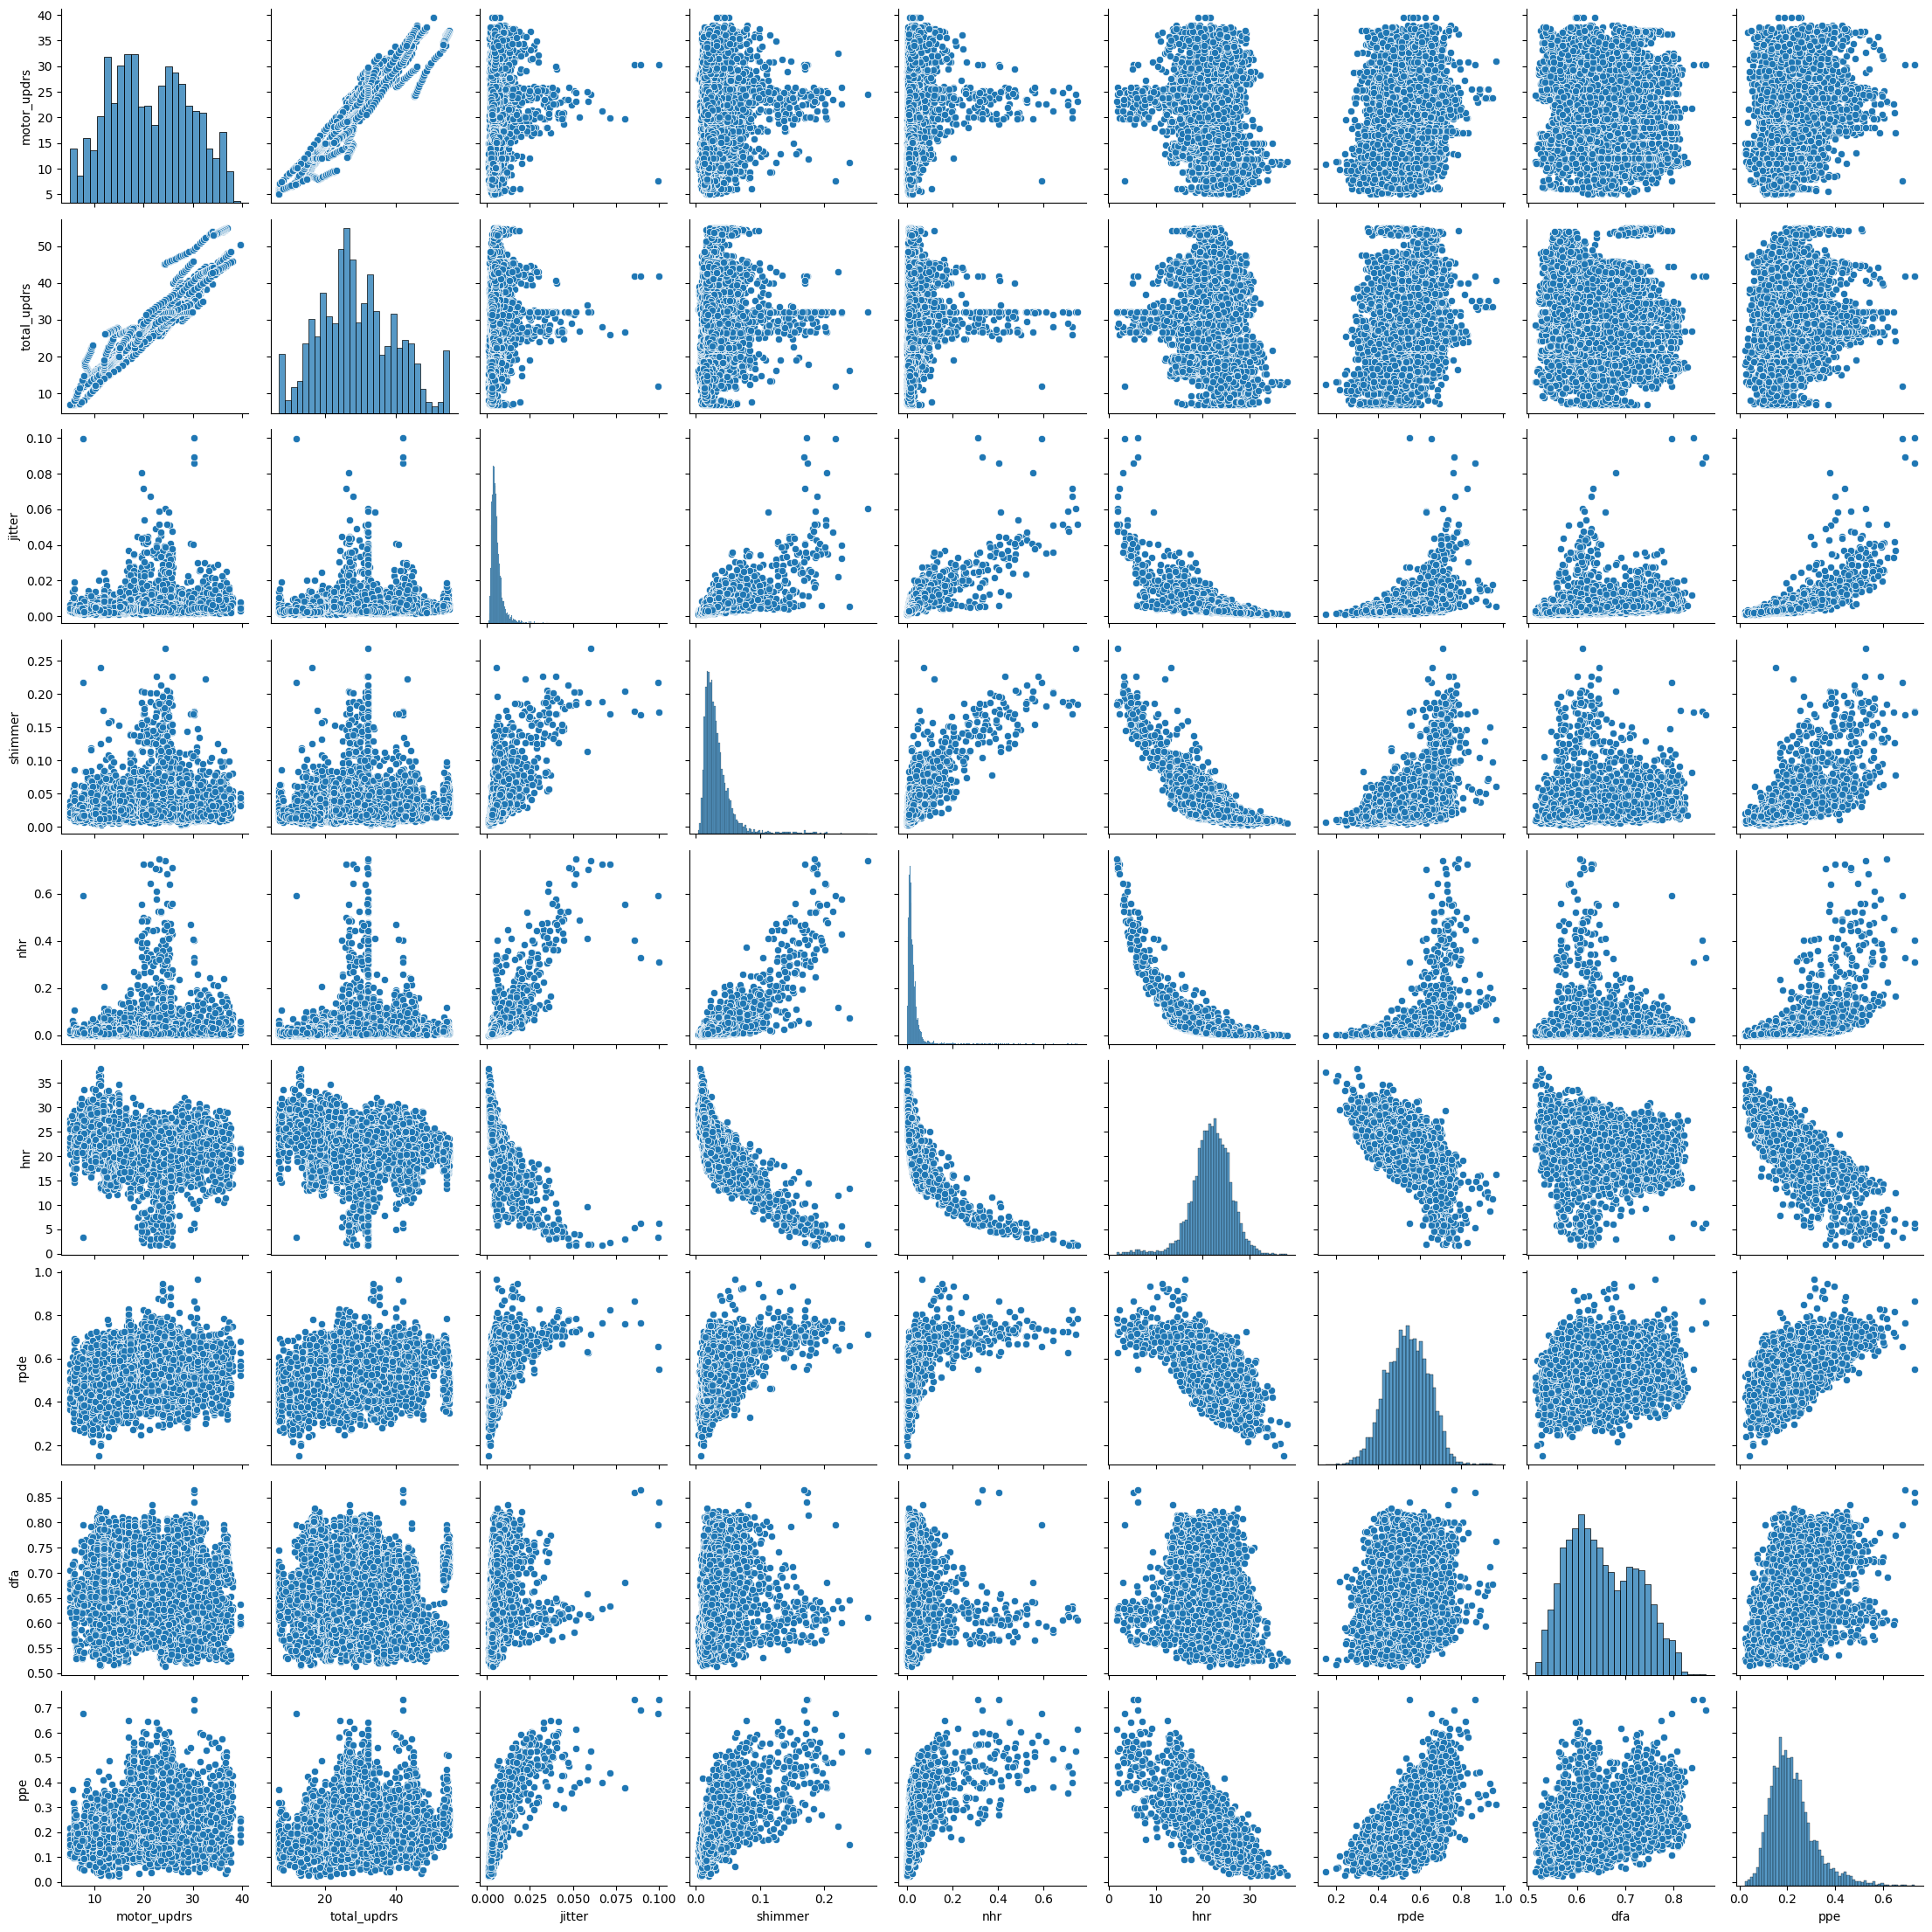

In [27]:
plt.figure(figsize=(15,13))
sns.pairplot(dfc)
plt.show()

<h3><b>NORMALISASI DATA</b></h3>

In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfc)

<h3><b>MEMBUAT DATAFRAME BARU DARI HASIL NORMALISASI</b></h3>

In [29]:
df_scaled = pd.DataFrame(df_scaled, columns=dfc.columns)
df_scaled.head()

,motor_updrs,total_updrs,jitter,shimmer,nhr,hnr,rpde,dfa,ppe
0,0.849197,0.502745,0.082905,-0.324594,-0.298721,-0.009205,-1.214066,-1.478500,-0.650658
1,0.879706,0.549103,-0.560793,-0.534016,-0.351965,1.282650,-1.055119,-1.247880,-1.218585
2,0.910216,0.595367,-0.238944,-0.669115,-0.199370,0.318711,-0.784860,-1.540139,-0.103280
3,0.936051,0.634716,-0.155370,-0.423692,-0.071754,0.644530,-0.536487,-1.062115,1.237075
4,0.970743,0.687522,-0.498557,-0.658276,-0.343370,1.036305,-0.689195,-1.297953,-0.283954


<h2><b>CLUSTERING</b></h2>

<h3><b>INISIALISASI PCA DAN TRANSFORMASI DATA</b></h3>

In [30]:
X = df_scaled
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

<h3><b>MELAKUKAN ELBOW METHOD UNTUK MENCARI JUMLAH CLUSTER TERBAIK DALAM MODEL</b></h3>

In [42]:
n_components_range = range(1, 11)
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_pca)
    bic_scores.append(gmm.bic(X_pca))

<p>Pada langkah yang saya lakukan di atas merupakan saya melakukan percobaan dengan membuat mode clutering dengan jumlah cluster yang berbeda dengan range 1 hingga 11 cluster.lalu hasil Bayesian Information Criterion dari setiap percobaan mode clustering.sehingga dapat di lihat dengan Elbow Method berapa jumlah cluster yang bagus</p>

<h3><b>VISUALISASI DATA LINE CHART UNTUK MELIHAT JUMLAH CLUSTER TERBAIK</b></h3>

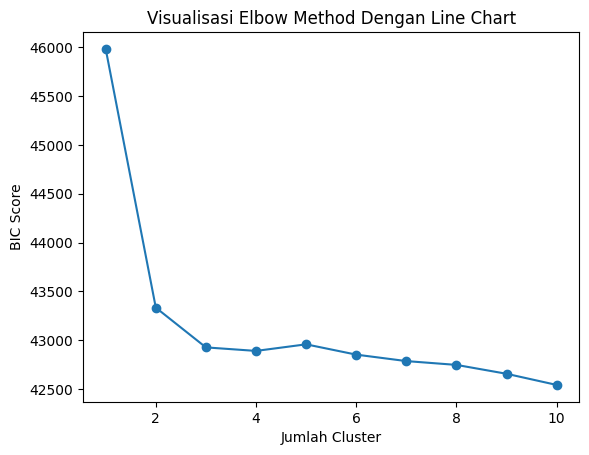

In [43]:

plt.plot(n_components_range, bic_scores, marker='o')
plt.title('Visualisasi Elbow Method Dengan Line Chart')
plt.xlabel('Jumlah Cluster')
plt.ylabel('BIC Score')
plt.show()

<p>Dengan visualisasi di atas dapat di simpulkan bahwa jumlah cluster yang paling optimal adalah 3 cluster</p>

<h3><b>MEMBUAT MODEL CLUSTERING DENGAN JUMLAH CLUSTER OPTIMAL (3 Cluster)</b></h3>

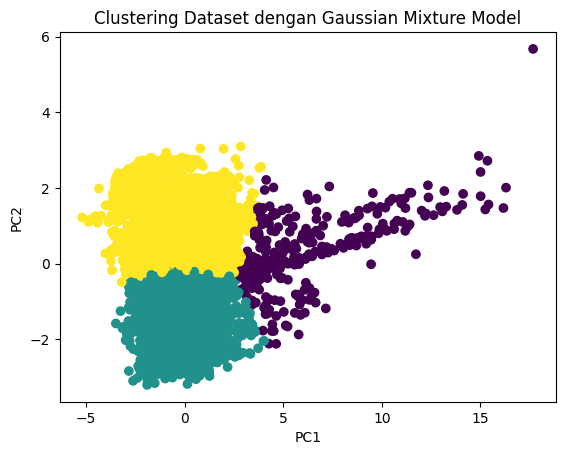

In [33]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_pca)

<h3><b>MEMBUAT KOLOM BARU UNTUK MENAMPUNG HASIL CLUSTERING</b></h3>

In [45]:
df_scaled['cluster'] = gmm.predict(X_pca)

<h3><b>VISUALISASI CLUSTER DENGAN SCATTER PLOT</b></h3>

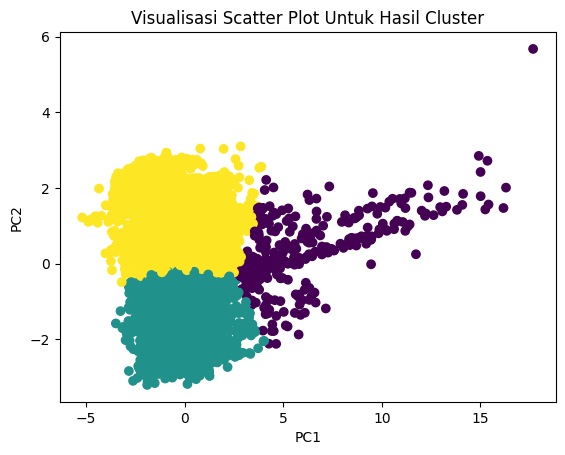

In [44]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_scaled['cluster'])
plt.title("Visualisasi Scatter Plot Untuk Hasil Cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

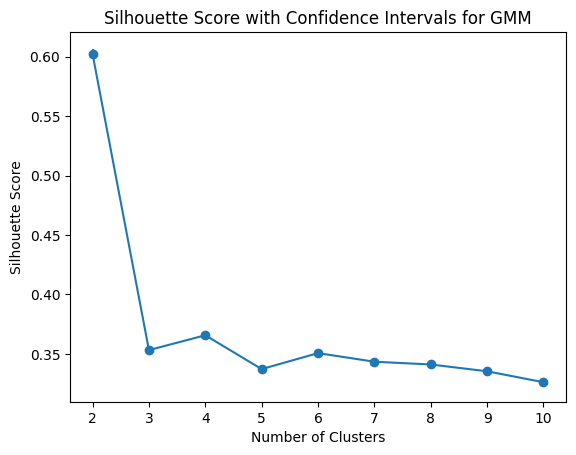

In [34]:
# Function to calculate silhouette score and confidence interval
def silhouette_confidence(X, n_components, n_samples=100):
    silhouette_scores = []

    for _ in range(n_samples):
        # Bootstrap sample
        X_bootstrap = resample(X, replace=True)

        # Fit GMM model
        gmm = GaussianMixture(n_components=n_components)
        gmm.fit(X_bootstrap)

        # Predict cluster labels
        labels = gmm.predict(X_bootstrap)

        # Calculate silhouette score
        silhouette_avg = silhouette_samples(X_bootstrap, labels).mean()
        silhouette_scores.append(silhouette_avg)

    # Calculate confidence interval
    confidence_interval = sem(silhouette_scores) * 1.96  # 95% confidence interval

    return np.mean(silhouette_scores), confidence_interval

# Calculate silhouette score and confidence interval for different number of clusters
n_components_range = range(2, 11)
silhouette_scores = []
confidence_intervals = []

for n_components in n_components_range:
    silhouette_avg, confidence_interval = silhouette_confidence(X_pca, n_components)
    silhouette_scores.append(silhouette_avg)
    confidence_intervals.append(confidence_interval)

# Plot silhouette scores with confidence intervals
plt.errorbar(n_components_range, silhouette_scores, yerr=confidence_intervals, marker='o')
plt.title('Silhouette Score with Confidence Intervals for GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [35]:
df_scaled.head()

,motor_updrs,total_updrs,jitter,shimmer,nhr,hnr,rpde,dfa,ppe,cluster
0,0.849197,0.502745,0.082905,-0.324594,-0.298721,-0.009205,-1.214066,-1.478500,-0.650658,1
1,0.879706,0.549103,-0.560793,-0.534016,-0.351965,1.282650,-1.055119,-1.247880,-1.218585,1
2,0.910216,0.595367,-0.238944,-0.669115,-0.199370,0.318711,-0.784860,-1.540139,-0.103280,1
3,0.936051,0.634716,-0.155370,-0.423692,-0.071754,0.644530,-0.536487,-1.062115,1.237075,1
4,0.970743,0.687522,-0.498557,-0.658276,-0.343370,1.036305,-0.689195,-1.297953,-0.283954,1


In [36]:
df_scaled.groupby('cluster').size()

cluster
0     296
1    2408
2    3171
dtype: int64

In [37]:
df_scaled.loc[df_scaled['cluster'] == 2].head()

,motor_updrs,total_updrs,jitter,shimmer,nhr,hnr,rpde,dfa,ppe,cluster
149,-1.257073,-1.400077,-0.027341,0.179026,-0.204714,-0.244130,-0.004684,1.492474,-0.291933,2
150,-1.239850,-1.393534,0.346075,0.589742,-0.097757,-0.798348,-0.529654,1.601648,0.034767,2
151,-1.222503,-1.386898,0.335406,0.106251,-0.126188,-0.660842,-0.472908,1.817457,0.833536,2
152,-1.205034,-1.380262,0.114912,0.650130,0.035287,-0.794153,0.048299,1.172568,-0.042509,2
153,-1.187565,-1.373720,-0.427430,-0.120978,-0.337791,-0.285148,-1.004018,1.125316,-0.327347,2


evaluasi cluster

In [38]:
# Assuming you have cluster labels from your GMM
gmm_labels = gmm.predict(X_pca)

# Calculate Davies-Bouldin Index
dbi_GMM = davies_bouldin_score(X_pca, gmm_labels)

print('DBI GMM Score: ', dbi_GMM)


DBI GMM Score:  0.9563003740694214


In [39]:
# Assuming you have cluster labels from your GMM
silhouette_labels = gmm.predict(X_pca)

# Calculate Silhouette Score
silhouette_GMM = silhouette_score(X_pca, silhouette_labels)

print('Silhouette GMM Score: ', silhouette_GMM)


Silhouette GMM Score:  0.3527930988557349


In [40]:
cal_labels = gmm.predict(X_pca)

cal_GMM = calinski_harabasz_score(X_pca, cal_labels)

print('Calinski GMM Score:', cal_GMM)

Calinski GMM Score: 3580.9761473342505
